In [ ]:
import pandas as pd

# Read in the dataset
df = pd.read_csv("/content/Steel_industry_data.csv")

# Convert the "date" column to a datetime data type
df["date"] = pd.to_datetime(df["date"])

# Group the data by the date and calculate the mean for each day
daily_mean = df.groupby(df["date"].dt.date).mean()

# Save the daily mean as a csv file
daily_mean.to_csv("daily_mean.csv", index=True)

<ipython-input-1-34bf02b8345d>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_mean = df.groupby(df["date"].dt.date).mean()


In [ ]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [ ]:
daily_mean

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
date,,,,,,,
2018-01-01,3.665208,1.735625,9.885000,0.000000,85.299375,57.076146,42750.0
2018-01-02,63.694375,29.284792,1.123854,0.028333,86.513646,97.887083,42750.0
2018-01-03,17.442083,5.274896,6.329583,0.007083,84.145729,82.801563,42750.0
2018-01-04,3.018958,1.737604,9.319479,0.000000,81.751667,55.545729,42750.0
2018-01-05,3.110937,1.949792,9.087813,0.000000,80.501042,56.299167,42750.0
...,...,...,...,...,...,...,...
2018-12-27,27.227812,9.291250,2.440313,0.011146,89.655625,93.456667,42750.0
2018-12-28,19.151875,6.244896,5.999062,0.007500,91.931562,81.060833,42750.0
2018-12-29,3.931458,1.250417,9.224375,0.000104,90.275417,57.799271,42750.0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(daily_mean)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(daily_mean.drop('Usage_kWh', axis=1), daily_mean['Usage_kWh'], test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train linear regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
print('Linear Regression RMSE:', mean_squared_error(y_test, y_pred, squared=False))

# Train Ridge regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
print('Ridge Regression RMSE:', mean_squared_error(y_test, y_pred, squared=False))

# Train Lasso regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
print('Lasso Regression RMSE:', mean_squared_error(y_test, y_pred, squared=False))

# Train SVM regression
svr = SVR(C=1.0, epsilon=0.2)
svr.fit(X_train_scaled, y_train)
y_pred = svr.predict(X_test_scaled)
print('SVM Regression RMSE:', mean_squared_error(y_test, y_pred, squared=False))

# Train Decision Tree regression
dtr = DecisionTreeRegressor(max_depth=5, random_state=42)
dtr.fit(X_train_scaled, y_train)
y_pred = dtr.predict(X_test_scaled)
print('Decision Tree RMSE:', mean_squared_error(y_test, y_pred, squared=False))

# Train Random Forest regression
rfr = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rfr.fit(X_train_scaled, y_train)
y_pred = rfr.predict(X_test_scaled)
print('Random Forest RMSE:', mean_squared_error(y_test, y_pred, squared=False))

Linear Regression RMSE: 1.2495625232882774
Ridge Regression RMSE: 1.2547977319229826
Lasso Regression RMSE: 1.1479214635506807
SVM Regression RMSE: 6.450883746687277
Decision Tree RMSE: 2.4197281291404233
Random Forest RMSE: 1.6650026897844425


Linear Regression RMSE: 1.114338298450885
Linear Regression R2 Score: 0.9947812476680167
Decision Tree Regressor RMSE: 1.858850112295688
Decision Tree Regressor R2 Score: 0.985478171048934
Random Forest Regressor RMSE: 0.9257298280390411
Random Forest Regressor R2 Score: 0.996398353474815


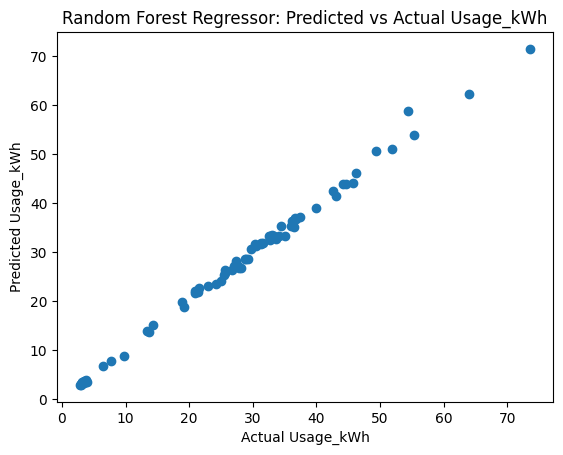

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(daily_mean.drop('Usage_kWh', axis=1), daily_mean['Usage_kWh'], test_size=0.2, random_state=42)

# Train linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
lr_r2 = r2_score(y_test, y_pred_lr)

# Train decision tree regressor model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_rmse = mean_squared_error(y_test, y_pred_dt, squared=False)
dt_r2 = r2_score(y_test, y_pred_dt)

# Train random forest regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_r2 = r2_score(y_test, y_pred_rf)

# Print results
print('Linear Regression RMSE:', lr_rmse)
print('Linear Regression R2 Score:', lr_r2)
print('Decision Tree Regressor RMSE:', dt_rmse)
print('Decision Tree Regressor R2 Score:', dt_r2)
print('Random Forest Regressor RMSE:', rf_rmse)
print('Random Forest Regressor R2 Score:', rf_r2)

# Plot predicted vs actual values for random forest regressor
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Usage_kWh')
plt.ylabel('Predicted Usage_kWh')
plt.title('Random Forest Regressor: Predicted vs Actual Usage_kWh')
plt.show()



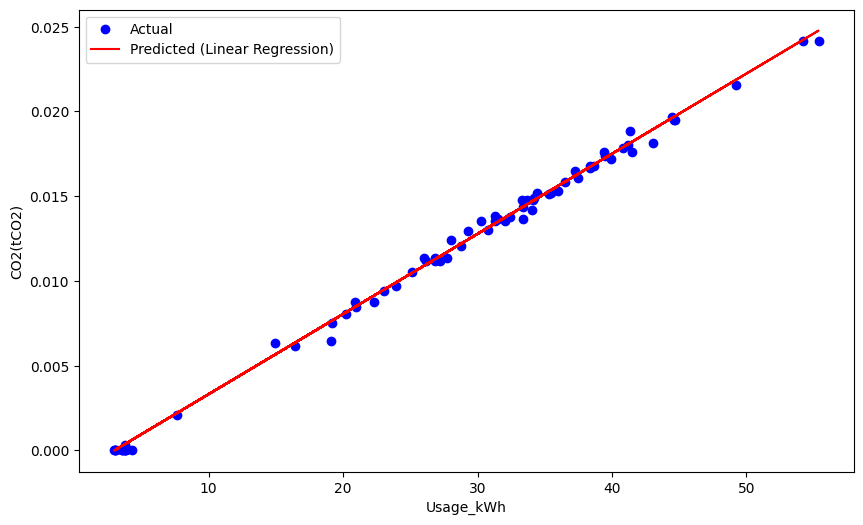

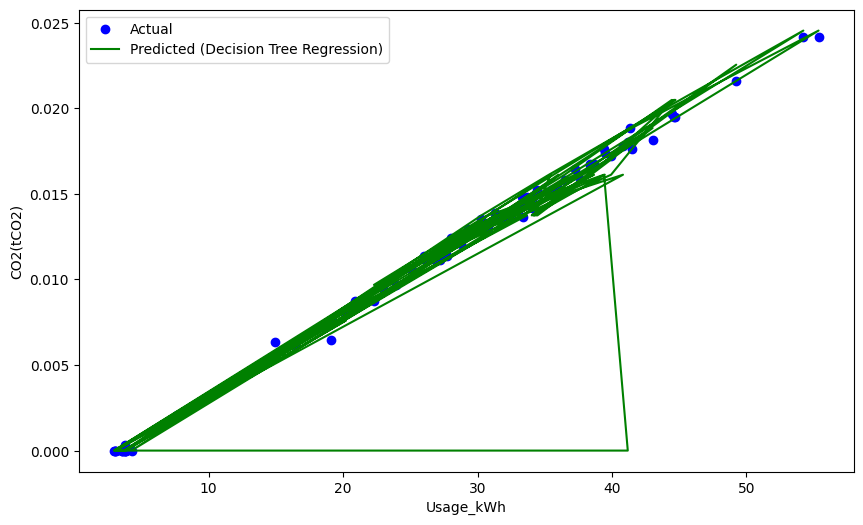

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Splitting the data into training and testing sets
train_size = int(0.8 * len(daily_mean))
train_X, train_y = daily_mean.iloc[:train_size]['Usage_kWh'], daily_mean.iloc[:train_size]['CO2(tCO2)']
test_X, test_y = daily_mean.iloc[train_size:]['Usage_kWh'], daily_mean.iloc[train_size:]['CO2(tCO2)']

# Reshaping the data
train_X = np.array(train_X).reshape(-1, 1)
train_y = np.array(train_y).reshape(-1, 1)
test_X = np.array(test_X).reshape(-1, 1)
test_y = np.array(test_y).reshape(-1, 1)

# Training the linear regression model
lr_model = LinearRegression()
lr_model.fit(train_X, train_y)

# Training the decision tree regression model
dt_model = DecisionTreeRegressor(max_depth=5)
dt_model.fit(train_X, train_y)

# Predicting on the test set using the trained models
lr_pred = lr_model.predict(test_X)
dt_pred = dt_model.predict(test_X)

# Plotting the predicted values against the actual values for the linear regression model
plt.figure(figsize=(10, 6))
plt.scatter(test_X, test_y, color='blue', label='Actual')
plt.plot(test_X, lr_pred, color='red', label='Predicted (Linear Regression)')
plt.xlabel('Usage_kWh')
plt.ylabel('CO2(tCO2)')
plt.legend()
plt.show()

# Plotting the predicted values against the actual values for the decision tree regression model
plt.figure(figsize=(10, 6))
plt.scatter(test_X, test_y, color='blue', label='Actual')
plt.plot(test_X, dt_pred, color='green', label='Predicted (Decision Tree Regression)')
plt.xlabel('Usage_kWh')
plt.ylabel('CO2(tCO2)')
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print('RMSE:', rmse)
print('R^2 score:', r2)

RMSE: 0.9257298280390411
R^2 score: 0.996398353474815


In [1]:
from sklearn.model_selection import train_test_split

X = daily_mean.drop(['Usage_kWh'], axis=1)
y = daily_mean['Usage_kWh']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NameError: name 'daily_mean' is not defined

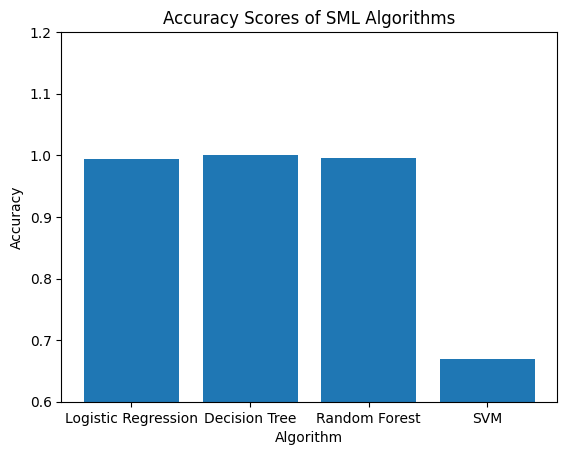

In [ ]:
import matplotlib.pyplot as plt

# create a list of algorithms and their accuracy scores
algorithms = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
accuracy_scores = [0.994, 1.0 , 0.996, 0.67]

# plot the bar chart
plt.bar(algorithms, accuracy_scores)
plt.ylim(0.6, 1.2) # set the y-axis limits
plt.title('Accuracy Scores of SML Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Read in the dataset
df = pd.read_csv("Steel_industry_data.csv")

# Convert the "date" column to a datetime data type
df["date"] = pd.to_datetime(df["date"])

# Group the data by the date and calculate the mean for each day
daily_mean = df.groupby(df["date"].dt.date).mean()

# Define the features and target variable
X = daily_mean.drop(columns=["Usage_kWh"])
y = daily_mean["Usage_kWh"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))

# Calculate R2 score
r2 = r2_score(y_test, y_pred)

# Print results
print("RMSE:", rmse)
print("R2 Score:", r2)

import numpy as np

# Create a random array with the same shape as X_test
X_new = np.array([[4.285	,7.574,	0.008587,	79.74855,	98.8555,	42750.0]])

# Predict the usage using the trained random forest model
y_new_pred = rf_model.predict(X_new)

# Print the predicted usage
print(y_new_pred)

RMSE: 1.0841234216518327
R2 Score: 0.9941943950351184
[21.04177083]


<ipython-input-12-a2e773a724c6>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_mean = df.groupby(df["date"].dt.date).mean()
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 22.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.1 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=225a5cea1f9456de54c8450cc9a67186e7183d63d380b8baa72c2091410862a5
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators
